In [3]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt

import time
import random

from gymnasium import spaces
import molcontrol

## Parameters
steps = 100000
molecule_lifetime = 1.0
dt = 0.5
history_length = 1
observable_indices = np.array([0])

##Seed
forget_param = 1/1000.0

def lookup_table(steps, target, molecule_lifetime, dt, history_length, observable_indices, upper_mol, forget_param, RUN_SEED):
    average_death = target * dt/molecule_lifetime
    action_array, counter_array = molcontrol.table_init(len(observable_indices), upper_mol, average_death)
    rewards_overtime = molcontrol.tabular_molecule_controller(action_array, counter_array, forget_param, steps, target, molecule_lifetime, dt, history_length, observable_indices, RUN_SEED)
    return rewards_overtime, action_array, counter_array

##We run both of these functions for a large number of seeds and display the averaged results
RUN_SEEDS = np.arange(0, 10)

target_avgs = np.array([1, 2, 5, 10, 20, 30, 50])
for target in target_avgs:
    table_rewards = []
    action_arrays = []
    opt_reward = []
    upper_mol = target*3 + 10
    for SEED in RUN_SEEDS:
        rewards_overtime, action_array, counter_array = lookup_table(steps, target, molecule_lifetime, dt, history_length, observable_indices, upper_mol, forget_param, SEED)
        table_rewards.append(rewards_overtime)
        action_arrays.append(action_array)
    
        rewards_overtime_opt = molcontrol.optimal_solution(steps, target, molecule_lifetime, dt, SEED)
        opt_reward.append(rewards_overtime_opt)
    
    reward_array = np.stack(table_rewards)
    reward_opt_array = np.stack(opt_reward)
    action_arrs = np.stack(action_arrays)
    
    np.savetxt("reward_array"+str(target)+".txt", reward_array)
    np.savetxt("reward_opt_array"+str(target)+".txt", reward_opt_array)
    np.savetxt("action_arrs"+str(target)+".txt", action_arrs)
    
    print ("Done for all the seeds for average ", target)




Done for all the seeds for average  1
Done for all the seeds for average  2
Done for all the seeds for average  5
Done for all the seeds for average  10
Done for all the seeds for average  20
Done for all the seeds for average  30
Done for all the seeds for average  50


The table's average overall is  -4.871808999999999
The optimal controllers average overall is  -4.876746
The table's average is  -4.867784000000001
The optimal controllers average is  -4.873899999999999


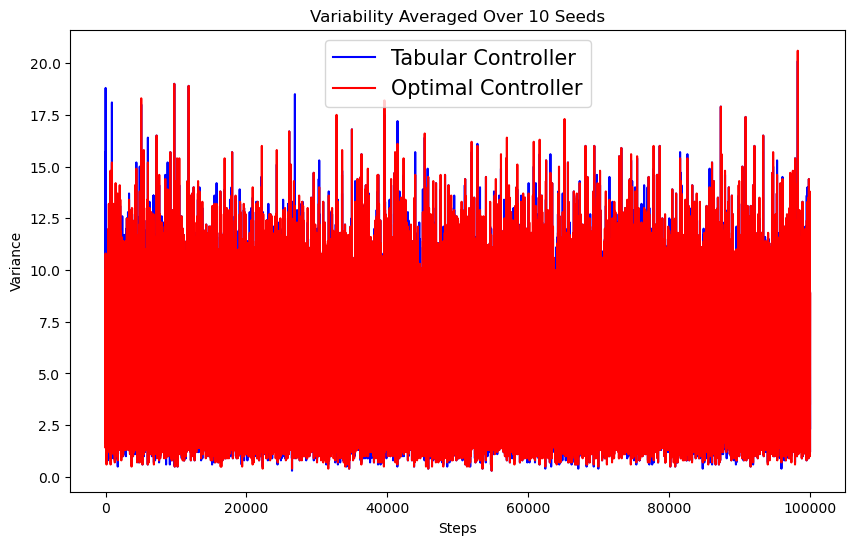

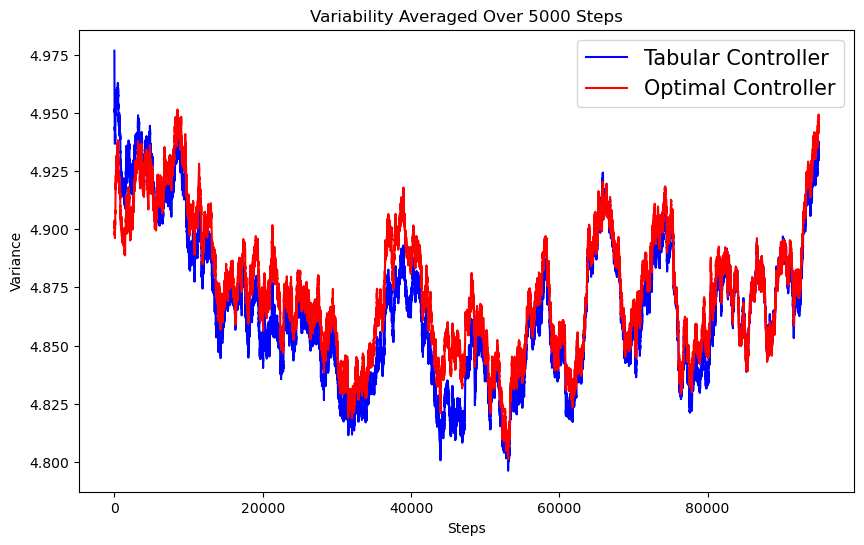

In [10]:
##Averaging across the seeds
rewards_overtime_average = np.mean(reward_array, axis=0)
rewards_overtime_opt_average = np.mean(reward_opt_array, axis=0)

print ("The table's average overall is ", np.mean(rewards_overtime_average))
print ("The optimal controllers average overall is ", np.mean(rewards_overtime_opt_average))

print ("The table's average is ", np.mean(rewards_overtime_average[50000:,]))
print ("The optimal controllers average is ", np.mean(rewards_overtime_opt_average[50000:,]))

plt.figure(figsize=(10, 6))
plt.plot(-rewards_overtime_average, linestyle='-', color='b', label = 'Tabular Controller')
plt.plot(-rewards_overtime_opt_average, linestyle='-', color='r', label = 'Optimal Controller')
plt.title("Variability Averaged Over 10 Seeds")
plt.xlabel("Steps")
plt.ylabel("Variance")
plt.legend(loc='best', fontsize = 15)
plt.savefig("Raw_Variability.png")
plt.show()

def smooth(data, smoothing_window):
    return np.convolve(data, np.ones(smoothing_window)/smoothing_window, mode='valid')

smoothing_window = 5000
smoothed_reward = smooth(rewards_overtime_average, smoothing_window)
smoothed_reward_opt = smooth(rewards_overtime_opt_average, smoothing_window)

plt.figure(figsize=(10, 6))
plt.plot(-smoothed_reward, linestyle='-', color='b', label = 'Tabular Controller')
plt.plot(-smoothed_reward_opt, linestyle='-', color='r', label = 'Optimal Controller')
plt.title("Variability Averaged Over 5000 Steps")
plt.xlabel("Steps")
plt.ylabel("Variance")
plt.legend(loc='best', fontsize = 15)
plt.savefig("Smoothed_Variability.png")
plt.show()